In [ ]:
import pandas as pd
from google.colab import drive
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('Nat_Gas.csv')
df['Dates'] = pd.to_datetime(df['Dates'])
# df.info()

In [ ]:
df.set_index('Dates', inplace=True)
df.head(2)

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3


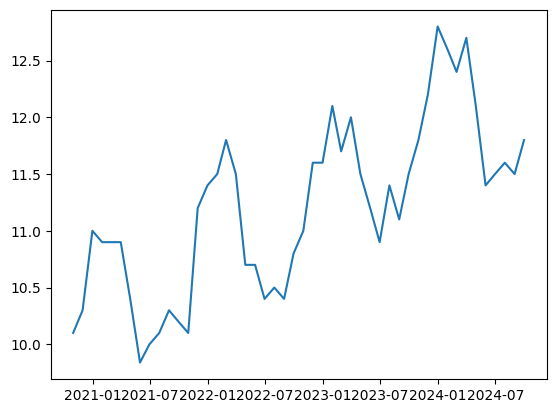

In [ ]:
plt.plot(df)
plt.show()

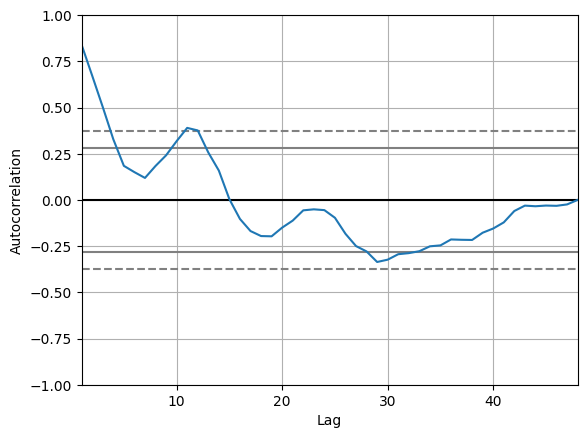

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -15.077
Date:                Wed, 15 Nov 2023   AIC                             42.155
Time:                        08:23:38   BIC                             53.255
Sample:                    10-31-2020   HQIC                            46.332
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0155      0.162      0.095      0.924      -0.302       0.333
ar.L2          0.1198      0.186      0.644      0.519      -0.245       0.484
ar.L3          0.0767      0.195      0.394      0.6

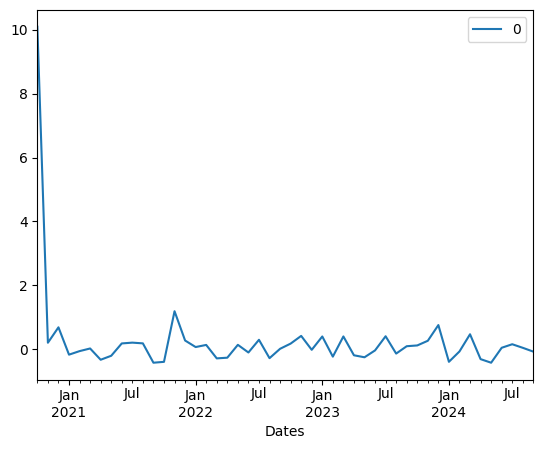

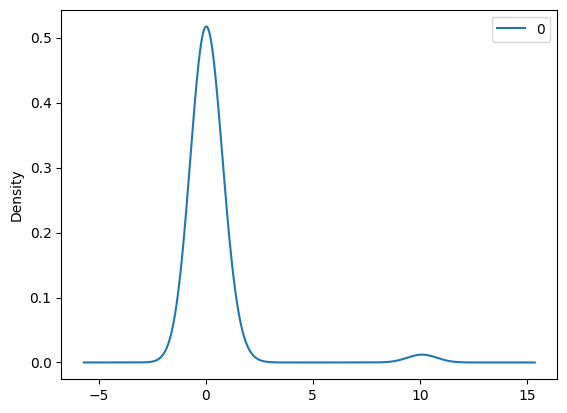

               0
count  48.000000
mean    0.263210
std     1.486744
min    -0.426131
25%    -0.196925
50%     0.041554
75%     0.217606
max    10.100000


In [ ]:
model = ARIMA(df, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings

def evaluate_arima_model(X, arima_order):
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  predictions = list()

  for t in range(len(test)):
    model = ARIMA(history, order = arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])

  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse, predictions, test, model


def evaluate_models(df, p_val, d_val, q_val):
  df = df.astype('float32')
  best_score, best_cfg = float('inf'), None
  for p in p_val:
    for d in d_val:
      for q in q_val:
        order = (p, d, q)
        try:
          rmse, predictions, test, model = evaluate_arima_model(df, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE = %.3f' % (order, rmse))
        except:
          continue
  print('Best ARIMA%s RMSE = %.3f' % (best_cfg, best_score))

In [ ]:
p_val = [0, 1, 2, 4, 6, 8, 10]
d_val = range(0, 3)
q_val = range(0, 3)

warnings.filterwarnings('ignore')
evaluate_models(df.values, p_val, d_val, q_val)

ARIMA(0, 0, 0) RMSE = 0.933
ARIMA(0, 0, 1) RMSE = 0.633
ARIMA(0, 0, 2) RMSE = 0.507
ARIMA(0, 1, 0) RMSE = 0.378
ARIMA(0, 1, 1) RMSE = 0.380
ARIMA(0, 1, 2) RMSE = 0.394
ARIMA(0, 2, 0) RMSE = 0.510
ARIMA(0, 2, 1) RMSE = 0.383
ARIMA(0, 2, 2) RMSE = 0.430
ARIMA(1, 0, 0) RMSE = 0.393
ARIMA(1, 0, 1) RMSE = 0.394
ARIMA(1, 0, 2) RMSE = 0.408
ARIMA(1, 1, 0) RMSE = 0.381
ARIMA(1, 1, 1) RMSE = 0.403
ARIMA(1, 1, 2) RMSE = 0.381
ARIMA(1, 2, 0) RMSE = 0.465
ARIMA(1, 2, 1) RMSE = 0.433
ARIMA(1, 2, 2) RMSE = 0.447
ARIMA(2, 0, 0) RMSE = 0.398
ARIMA(2, 0, 1) RMSE = 0.444
ARIMA(2, 0, 2) RMSE = 0.419
ARIMA(2, 1, 0) RMSE = 0.391
ARIMA(2, 1, 1) RMSE = 0.395
ARIMA(2, 1, 2) RMSE = 0.376
ARIMA(2, 2, 0) RMSE = 0.438
ARIMA(2, 2, 1) RMSE = 0.428
ARIMA(2, 2, 2) RMSE = 0.417
ARIMA(4, 0, 0) RMSE = 0.431
ARIMA(4, 0, 1) RMSE = 0.456
ARIMA(4, 0, 2) RMSE = 0.436
ARIMA(4, 1, 0) RMSE = 0.402
ARIMA(4, 1, 1) RMSE = 0.358
ARIMA(4, 1, 2) RMSE = 0.331
ARIMA(4, 2, 0) RMSE = 0.436
ARIMA(4, 2, 1) RMSE = 0.426
ARIMA(4, 2, 2) RMSE 

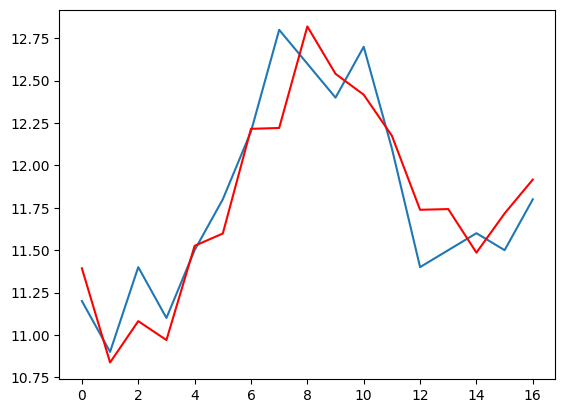

In [ ]:
best_order = (10, 2, 1)
rmse, predictions, test, model = evaluate_arima_model(df.values, best_order)
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions', color='red')

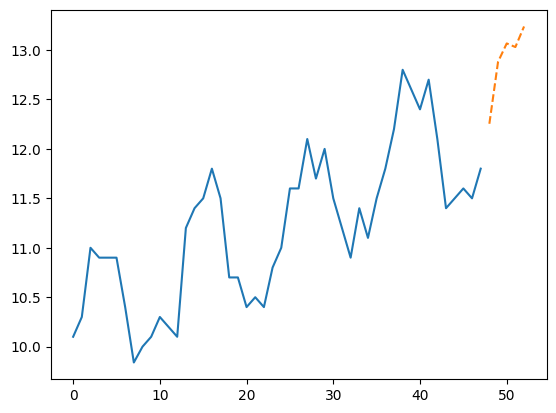

In [ ]:
model = ARIMA(df.values, order = best_order)
model_fit = model.fit()
forecast_steps = 5
predictions = model_fit.forecast(steps = forecast_steps)
plt.plot(df.values, label = 'Historical Data')
plt.plot(range(len(df), len(df) + forecast_steps), predictions, label = 'ARIMA Forecast', linestyle = 'dashed')
plt.show()